In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

%matplotlib inline
plt.style.use('classic')

%load_ext autoreload

%autoreload 2

In [2]:
root_folder = Path.cwd().parent.parent
data_folder = Path(root_folder).joinpath('data', 'external')

In [3]:
from src.data.task_1_food_security.dataset import Dataset

In [4]:
ds = Dataset(root_folder=root_folder)

ds.prepare_dataset_array()

In [5]:
x_train = ds.X_train_flat
y_train = ds.y_train_sev


In [6]:
from sklearn.linear_model import LinearRegression

def get_regressor():
    return LinearRegression()

def grid_search(x_train, y_train):

    # fix random seed for reproducibility
    seed = 7
    np.random.seed(seed)
    # create model


    param_grid = dict()
    model = get_regressor()
    param_grid = {}
    grid = GridSearchCV(estimator=model,
                        param_grid=param_grid,
                        verbose=1,
                        n_jobs=1,
                        scoring='neg_root_mean_squared_error')


    grid_result = grid.fit(x_train, y_train)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    return grid_result

In [7]:
grid_result_severity = grid_search(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best: -0.610562 using {}
-0.610562 (0.055384) with: {}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [8]:
grid_result_severity.best_params_

{}

In [9]:
grid_result_severity.best_score_

-0.6105622622061004

In [10]:
x_test = ds.X_test_flat
grid_result_severity.score(x_test, ds.y_test_sev)

-0.8656541971163741

In [11]:
pred = grid_result_severity.best_estimator_.predict(x_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(ds.y_test_sev, pred, squared=False)

0.8656541971163741

In [15]:
ds.save_predicted(pred, "linreg")

,adm2_name_code,NAME,severity_2013,phase1_2013,phase2_2013,phase3_2013,phase4_2013,phase5_2013,severity_2014,phase1_2014,...,adm2_name,severity,phase1,phase2,phase3,phase4,phase5,adm2_name_old,sample,severity_linreg
0,25,Foundiougne,1.883139,0.500000,0.471999,0.025000,0.003001,0.0,1.562505,0.750000,...,0,1.510005,0.810000,0.129999,0.060001,0.0,0.0,Velingara,270,1.708776
1,19,Koungheul,1.330016,0.829998,0.150001,0.020002,0.000000,0.0,1.554995,0.830003,...,1,1.300004,0.850000,0.129999,0.020001,0.0,0.0,Kolda,271,0.520361
2,39,Bounkiling,1.990030,0.589997,0.310001,0.100002,0.000000,0.0,1.442474,0.830004,...,2,1.592506,0.779999,0.150000,0.070001,0.0,0.0,Medina Yoro Foulah,272,2.110774
3,26,Diourbel,1.631865,0.650001,0.324001,0.024999,0.001000,0.0,1.637503,0.700001,...,3,1.750002,0.700000,0.220000,0.080000,0.0,0.0,Louga,273,1.309165
4,8,Saint Louis,1.194998,0.870001,0.129999,0.000000,0.000000,0.0,1.255003,0.879998,...,4,1.359997,0.860000,0.100001,0.039999,0.0,0.0,Linguere,274,0.903316
5,18,Birkelane,1.329983,0.830003,0.149997,0.020000,0.000000,0.0,1.412524,0.849996,...,5,1.247498,0.859999,0.130002,0.009999,0.0,0.0,Kebemer,275,1.077150
6,16,Kaffrine,1.314992,0.840001,0.140001,0.019998,0.000000,0.0,1.352494,0.840001,...,6,1.487497,0.750002,0.219998,0.030000,0.0,0.0,Dagana,276,0.795258
7,22,Guinguineo,1.255007,0.879997,0.100003,0.020001,0.000000,0.0,1.510004,0.809998,...,7,1.750000,0.700000,0.220000,0.080000,0.0,0.0,Podor,277,0.752092
8,2,Medina Yoro Foulah,1.502484,0.790004,0.159999,0.049997,0.000000,0.0,1.794976,0.720002,...,8,1.105001,0.929999,0.070001,0.000000,0.0,0.0,Saint Louis,278,1.430223
9,15,Rufisque,1.150000,0.900000,0.100000,0.000000,0.000000,0.0,1.255000,0.880001,...,9,1.637565,0.699990,0.250004,0.050007,0.0,0.0,Ranerou,279,1.131931


In [16]:
pred

array([ 2.73994117,  0.60540343, -0.47990903,  2.33541646,  1.20028325,
        2.92099755,  3.90077381,  2.01466157,  1.19461178,  0.43476046,
        0.86481593,  0.80311662,  1.07715034,  1.62237804,  1.69363788,
        0.90331579,  1.30916502,  2.14780411,  1.98975516,  1.40929987,
        2.29986428,  2.34126744,  2.11077385,  1.03202102,  0.65199244,
        0.75209223,  1.1319306 ,  1.4302233 ,  1.47306773,  2.07631367,
        1.85994148,  0.82430943,  0.96960951,  1.70877567,  1.62809194,
        1.38737545,  1.80746919,  0.79525765,  1.47997319,  2.59546153,
        0.52036088,  2.61381325,  1.85321103,  1.05955539,  1.81450048])

## Predict proportion of population

In [11]:
# x_train is same

# get the proportions
grid_res = {}
for i in range(5):
    y_train = ds.y_train_perc[:,i]
    gr = grid_search(x_train, y_train)
    grid_res[str(i)] = gr

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best: -0.242776 using {}
-0.242776 (0.016901) with: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best: -0.176860 using {}
-0.176860 (0.010108) with: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best: -0.080579 using {}
-0.080579 (0.007882) with: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best: -0.011690 using {}
-0.011690 (0.001639) with: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best: 0.000000 using {}
0.000000 (0.000000) with: {}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [40]:
sample2region = ds.df_sample_year_location.copy()
sample2region.head(1)

,sample,season,adm2_name_code
0,0,2013,0


In [41]:
sample_train = sample2region.iloc[ds.idx_train]
sample_test = sample2region.iloc[ds.idx_test]

In [42]:
sample_train.head()

,sample,season,adm2_name_code
266,266,2018,41
37,37,2013,37
16,16,2013,16
253,253,2018,28
144,144,2016,9


In [43]:
grid_res

{'0': GridSearchCV(estimator=LinearRegression(), n_jobs=1, param_grid={},
              scoring='neg_root_mean_squared_error', verbose=1),
 '1': GridSearchCV(estimator=LinearRegression(), n_jobs=1, param_grid={},
              scoring='neg_root_mean_squared_error', verbose=1),
 '2': GridSearchCV(estimator=LinearRegression(), n_jobs=1, param_grid={},
              scoring='neg_root_mean_squared_error', verbose=1),
 '3': GridSearchCV(estimator=LinearRegression(), n_jobs=1, param_grid={},
              scoring='neg_root_mean_squared_error', verbose=1),
 '4': GridSearchCV(estimator=LinearRegression(), n_jobs=1, param_grid={},
              scoring='neg_root_mean_squared_error', verbose=1)}

In [44]:
sample_test

,sample,season,adm2_name_code
167,167,2016,32
211,211,2017,31
63,63,2014,18
154,154,2016,19
5,5,2013,5
...,...,...,...
15,15,2013,15
10,10,2013,10
228,228,2018,3
184,184,2017,4


In [45]:
df_pred = sample_test.copy()
df_pred['value'] = pred
df_pred['variable'] = 'xgboost'

In [46]:
df_train = sample_train.copy()
df_train['value'] = y_train
df_train['variable'] = 'train'

In [47]:
df_gt = sample_test.copy()
df_gt['value'] = ds.y_test_sev
df_gt['variable'] = 'ground_truth'

df = pd.concat([df_pred, df_train, df_gt])

In [48]:
import seaborn as sns

In [49]:
df.head()

,sample,season,adm2_name_code,value,variable
167,167,2016,32,1.156028,xgboost
211,211,2017,31,0.254610,xgboost
63,63,2014,18,1.643582,xgboost
154,154,2016,19,2.003758,xgboost
5,5,2013,5,1.464594,xgboost


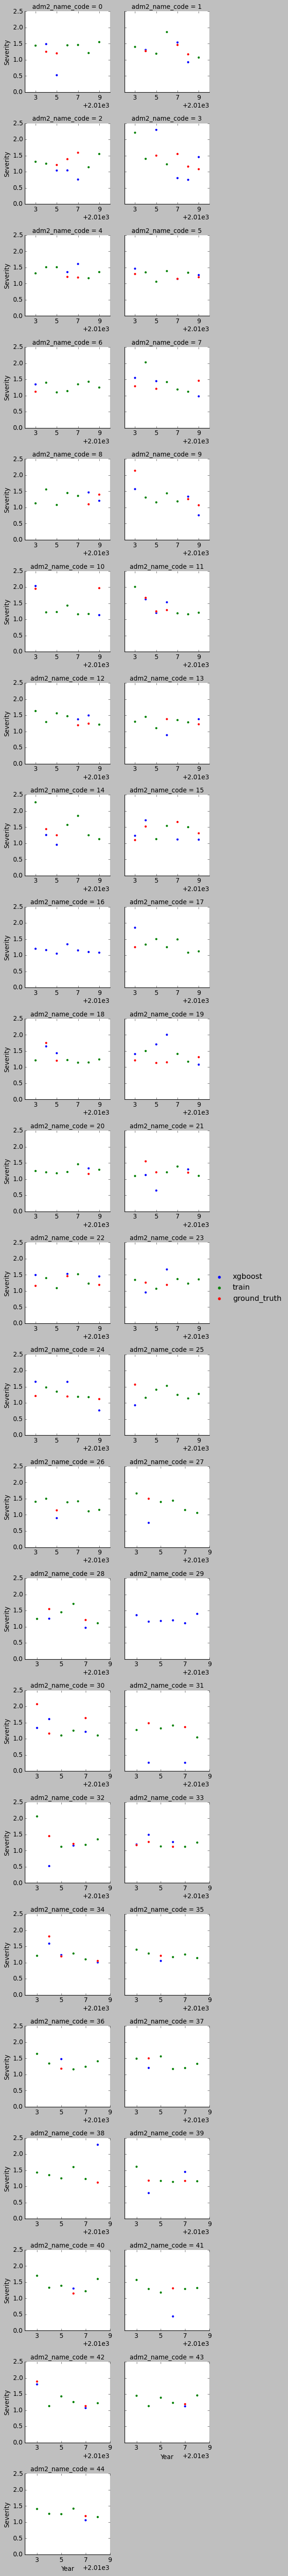

In [50]:
g = sns.FacetGrid(data=df, col='adm2_name_code', col_wrap=2, sharex=False)
g.map(sns.scatterplot, 'season', 'value', 'variable')
g.add_legend()
g.set_xlabels('Year')
g.set_ylabels('Severity')
g.set(xticks=[2013, 2015, 2017, 2019])
